        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington

<h1 align='center' style="color: blue;">Assignment #2</h1>

<p><b>Question #1</b>: 
<p>Consider the MNIST dataset:</p> 

In [157]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version = 1)
X = mnist['data']
y = mnist['target']
y = y.astype(np.uint8)

As you know, each X represents a flattened version of a 28 * 28 pixel image in 2 dimensions. You can visualize a sample digit image using the following code.

(784,)


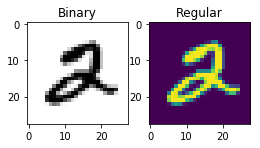

In [158]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
a_sample_digit = X[5]
print(a_sample_digit.shape)
a_sample_digit_image = a_sample_digit.reshape(28,28)

fig, axes = plt.subplots(1,2, figsize=(4,8))
axes[0].imshow(a_sample_digit_image, cmap='binary')
axes[1].imshow(a_sample_digit_image)

axes[0].set_title("Binary")
axes[1].set_title("Regular")

plt.show()

Your job is to convert this image to a three-dimensional image and change its font color to red with a white background. Visualize your imgae.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


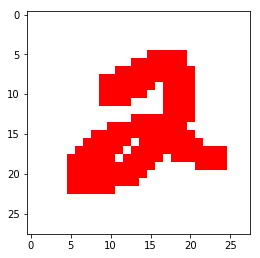

In [159]:
# Write your answer here
test = a_sample_digit_image.copy()
stacked_img = np.stack((test,)*3, axis=-1)

for i in range(len(stacked_img)):
    for j in range(len(stacked_img)):
        if stacked_img[i][j].any() > 0:
            stacked_img[i][j][0] = 255
            stacked_img[i][j][1] = 0
            stacked_img[i][j][2] = 0

for i in range(len(stacked_img)):
    for j in range(len(stacked_img)):
        if stacked_img[i][j].any() == 0:
            stacked_img[i][j]=255

fig, axes = plt.subplots(1,1, figsize=(4,8))
axes.imshow(stacked_img)

<p><b>Question #2</b>:</p>
<p><b>Important Note:</b> In this Question you need to use Stochastic Gradient Descent classifier. Read more about this classifier at:<p>
<p><b>Link1: </b><a href='https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31'>Click Here</a></p>
<p><b>Link2: </b><a href='https://towardsdatascience.com/an-introduction-to-gradient-descent-c9cca5739307'>Click Here</a></p>

You can import this classifer from scikit-learn package using the following code: 

In [160]:
from sklearn.linear_model import SGDClassifier

<b>Note:</b> Use SGDClassifier with its own default hyperparameters.

<ol>
    <li>Consider the MNIST dataset again and follow the steps discussed in the class on the development of predictive models using the scikit-learn package. Develop a <u>Stochastic Gradient Descent</u> classifier that can distinguish digit 7 from the other digits.</li>
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li>Use the <b style="color:red">stratify</b> attribute to put same proportion of data in train and test set.</li>  
            <li>Use all features to creat your predictive model</li>
            <li><b>y</b> is your dependent variable</li>
    </ul>
        <li>What is the accuracy of your model for out-of-sample data?</li>
        <li>Compute the <b>precision</b>, <b>recall</b>, and <b>F1</b> scores for in-sample and out-of-sample data.</li>
    <li>Create a second classifier using the Stochastic Gradient Descent Classifier, which can distinguish the digit 7 from the other digits.<b></b> </li>
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li><b style="color:red">DO NOT USE STRATIFY THIS TIME.</b></li>
            <li>Use all features to creat your predictive model</li>
            <li><b>y</b> is your dependent variable</li>
    </ul>
    <li>What is the accuracy of the second classifier for the out-of-sample data?</li>
    <li>Compute the <b>precision</b>, <b>recall</b>, and <b>F1</b> scores of the second classifer for in-sample and out-of-sample data.</li>
    <li>Create a third classifier using the Stochastic Gradient Descent Classifier, which can distinguish the digit 7 from the other digits.<b></b> </li>
    <ul>
        <li>Use <u><b>85%</b></u> of data for tarining and consider <u><b>15%</b></u> of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li>Use the <b style="color:red">stratify</b> attribute to put same proportion of data in train and test set.</b></li>
            <li>Use all features to creat your predictive model</li>
            <li><b>y</b> is your dependent variable</li>
    </ul>
    <li>What is the accuracy of the third classifier for the out-of-sample data?</li>
    <li>Compute the <b>precision</b>, <b>recall</b>, and <b>F1</b> scores of the second classifer for in-sample and out-of-sample data.</li>
    <li>Compare the three models. Which one works the best? Explain.</li>
</ol>

In [161]:
# Write your answer here (part1)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

for i in  range(len(y)):
    if y[i] == 7:
        y[i] = 1
    else:
        y[i] = 0

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


model = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

model.fit(X_train, y_train)

y_test_hat = model.predict(X_test)

C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [162]:
# Write your answer here (part2)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_hat, normalize = True) * 100 


98.18571428571428

In [163]:
# Write your answer here (part3)

from sklearn.metrics import classification_report, confusion_matrix #Importing function to calculate confusion matrix

y_train_hat = model.predict(X_train)

print("In-sample data scores are:\n") 
print(classification_report(y_train,y_train_hat)) 


print("\n\n\nOut-of-sample data scores are:\n")
print(classification_report(y_test,y_test_hat))


In-sample data scores are:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     43895
           1       0.93      0.91      0.92      5105

   micro avg       0.98      0.98      0.98     49000
   macro avg       0.96      0.95      0.95     49000
weighted avg       0.98      0.98      0.98     49000




Out-of-sample data scores are:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18812
           1       0.92      0.91      0.91      2188

   micro avg       0.98      0.98      0.98     21000
   macro avg       0.95      0.95      0.95     21000
weighted avg       0.98      0.98      0.98     21000



In [164]:
# Write your answer here (part4)

mnist = fetch_openml('mnist_784', version = 1)
X = mnist['data']
y = mnist['target']
y = y.astype(np.uint8)

for i in  range(len(y)):
    if y[i] == 7:
        y[i] = 1
    else:
        y[i] = 0

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)


model2 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

model2.fit(X_train, y_train)

y_test_hat = model2.predict(X_test)

C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [165]:
# Write your answer here (part5)

accuracy_score(y_test,y_test_hat, normalize = True) * 100

97.72380952380952

In [166]:
# Write your answer here (part6)

from sklearn.metrics import classification_report, confusion_matrix #Importing function to calculate confusion matrix

y_train_hat = model2.predict(X_train)

print("In-sample data scores are:\n") 
print(classification_report(y_train,y_train_hat)) 


print("\n\n\nOut-of-sample data scores are:\n")
print(classification_report(y_test,y_test_hat))

In-sample data scores are:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     43896
           1       0.95      0.85      0.90      5104

   micro avg       0.98      0.98      0.98     49000
   macro avg       0.97      0.92      0.94     49000
weighted avg       0.98      0.98      0.98     49000




Out-of-sample data scores are:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18811
           1       0.95      0.83      0.88      2189

   micro avg       0.98      0.98      0.98     21000
   macro avg       0.96      0.91      0.94     21000
weighted avg       0.98      0.98      0.98     21000



In [167]:
# Write your answer here (part7)

mnist = fetch_openml('mnist_784', version = 1)
X = mnist['data']
y = mnist['target']
y = y.astype(np.uint8)

for i in  range(len(y)):
    if y[i] == 7:
        y[i] = 1
    else:
        y[i] = 0

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.15, random_state=0, stratify=y)


model3 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

model3.fit(X_train, y_train)

y_test_hat = model3.predict(X_test)

C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [136]:
# Write your answer here (part8)

accuracy_score(y_test,y_test_hat, normalize = True) * 100

97.28571428571429

In [168]:
# Write your answer here (part9)

from sklearn.metrics import classification_report, confusion_matrix #Importing function to calculate confusion matrix

y_train_hat = model3.predict(X_train)

print("In-sample data scores are:\n") 
print(classification_report(y_train,y_train_hat)) 


print("\n\n\nOut-of-sample data scores are:\n")
print(classification_report(y_test,y_test_hat))


In-sample data scores are:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     53301
           1       0.90      0.87      0.89      6199

   micro avg       0.98      0.98      0.98     59500
   macro avg       0.94      0.93      0.94     59500
weighted avg       0.98      0.98      0.98     59500




Out-of-sample data scores are:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9406
           1       0.89      0.85      0.87      1094

   micro avg       0.97      0.97      0.97     10500
   macro avg       0.94      0.92      0.93     10500
weighted avg       0.97      0.97      0.97     10500



In [170]:
# Write your answer here (part10)

print("By comparing the accuracy scores of the three models, we can conclude that the third classifier with the accuracy score of     98.185 is the best model.\nWe considered the accuracy score for comparing, since we are looking at data which has to acurately predict if the digit is 7  or not.")

By comparing the accuracy scores of the three models, we can conclude that the third classifier with the accuracy score of     98.185 is the best model.
We considered the accuracy score for comparing, since we are looking at data which has to acurately predict if the digit is 7  or not.


<p><b>Question #3</b>: 
<ol>
    <li>Download the heart.csv dataset from the Canvas and use <b>read_csv( )</b> to read it.</li>
    <li>Creat a new column named <b>'age_cat'</b> in the DataFrame to present individuals' age with 4 categories. Here is the list of categories:
        <ul>
            <li>25-35</li>
            <li>36-45</li>
            <li>46-55</li>
            <li>56-65</li>
            <li>65+</li>
        </ul>
    </li>
    <li>Use the pandas' visualization capability and creat a pie chart to show the percentage of individuals in each age category.
        <ul>
            <li>Use the <u>Explode</u> feature of pie chart in matplotlib to separate the age category of 46-55.</li>
        </ul>
    </li>
    <li>Use the pandas' visualization capability to creat a histogram with with 15 bins and white edgecolor to visualize the distribution of <b>"chol"</b> feature. Then use the annotation function to point to the bin with the highest value.
    <ul>
        <li>use the <b style='color:red'>np.histogram</b> function to clearly determine the value of each bin.</li>
    </ul>
    </li>
    <li>Use <u>logistic regression</u> to create a prediction model
        <ul>
            <li>Use 65% of data for tarining and consider 35% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li>Use all features (13 features in the orignal dataset, you don't need to use age_cat) to creat your predictive model</li>
            <li><b>traget</b> is your dependent variable. It shows whether the subject suffers form a heart disease or not.</li>
        </ul>
    </li>
    <li>Use similar structure as above to create a <u>naive bayes</u> predictive model.</li>
    <li>Use in-sample data (train data) and out-of-sample data (test data) to check the accuracy of your naive bayes model:
        <ul>
            <li>What is the general expectation? should we expect to get higher accuray on in-sample data or out-of-sample data</li>
            <li>What is the result in your case?</li>
        </ul>
    </li>
    <li>Visualize the confusion matrix using a heatmap for both logistic regression, and naive bayes.</li>
</ol>
</p>

In [88]:
# Write your answer here (part1)
import pandas as pd

data = pd.read_csv('heart.csv')


In [89]:
# Write your answer here (part2)

data['age_cat']=pd.cut(x=data['age'], bins=[25, 35, 45, 55, 65, 122]) 

data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(55, 65]"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(35, 45]"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(35, 45]"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(55, 65]"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(55, 65]"


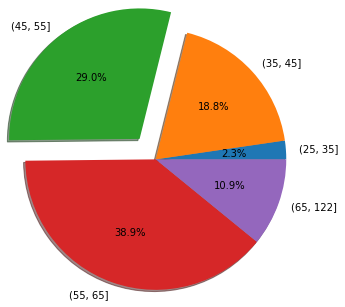

In [92]:
# Write your answer here (part3)

data1=data.groupby('age_cat').size().reset_index(name='Count') 


fig1, ax1 = plt.subplots()

ax1.pie(data1.Count, labels=data1.age_cat, shadow=True, autopct='%1.1f%%', radius=1.5, explode=[0,0,0.3,0,0])

plt.show()

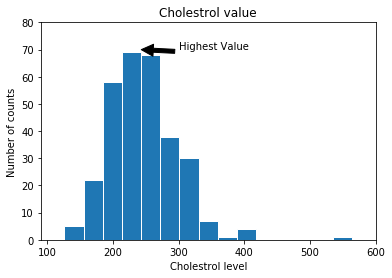

In [95]:
# Write your answer here (part4)

plt.ylim(0,80) 
plt.xlim(90,600)
plt.xlabel('Cholestrol level')
plt.ylabel('Number of counts')
plt.title('Cholestrol value')

bin_values = np.histogram(data.chol, bins='auto', density=True)


plt.hist(data.chol, bins=15, edgecolor='white') 

plt.annotate('Highest Value', xy = (240,70), xytext=(300, 70), arrowprops = dict(facecolor='black', shrink = 0.05));

In [129]:
# Write your answer here (part5)

from sklearn.model_selection import train_test_split 

data.head()

features=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
target='target'
X=data.loc[:,features] 
y=data.loc[:,target] 

from sklearn.linear_model import LogisticRegression 

model= LogisticRegression()

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.35, random_state=0)

print("X_train shape is {}".format(X_train.shape))
print("y_train shape is {}".format(y_train.shape))
print("X_test shape is {}".format(X_test.shape))
print("y_test shape is {}".format(y_test.shape))

model.fit(X_train, y_train)  

y_test_hat=model.predict(X_test) 

print(y_test_hat)


from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_hat, normalize = True) * 100 

X_train shape is (196, 13)
y_train shape is (196,)
X_test shape is (107, 13)
y_test shape is (107,)
[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1]


C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.30841121495327

In [131]:
# Write your answer here (part6)

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train,y_train)

pred = model.predict(X_test)

print(pred)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1]


In [133]:
# Write your answer here (part7)

from sklearn.metrics import classification_report,confusion_matrix
accuracy_train = model.predict(X_train)
accuracy_test = model.predict(X_test)

 
print("Accuracy of train Data")
print(accuracy_score(y_train,accuracy_train))
print(classification_report(y_train,accuracy_train))  

print("Accuracy of Test Data")
print(accuracy_score(y_test, accuracy_test)) 
print(classification_report(y_test,accuracy_test))

Accuracy of train Data
0.8469387755102041
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        85
           1       0.86      0.87      0.87       111

   micro avg       0.85      0.85      0.85       196
   macro avg       0.84      0.84      0.84       196
weighted avg       0.85      0.85      0.85       196

Accuracy of Test Data
0.794392523364486
              precision    recall  f1-score   support

           0       0.84      0.72      0.78        53
           1       0.76      0.87      0.81        54

   micro avg       0.79      0.79      0.79       107
   macro avg       0.80      0.79      0.79       107
weighted avg       0.80      0.79      0.79       107



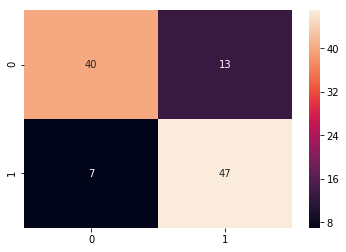

In [134]:
# Write your answer here (part8)

from sklearn.metrics import classification_report
import seaborn as sns

log_heatmap = confusion_matrix(y_test,y_test_hat)

sns.heatmap(log_heatmap, annot=True)

Confusion Matrix for Naive Bayes:


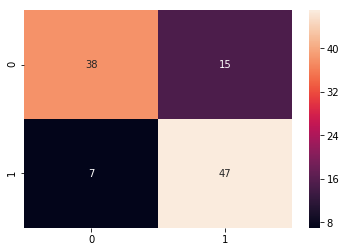

In [136]:
NB_heatmap = confusion_matrix(y_test,pred)
print("Confusion Matrix for Naive Bayes:")
sns.heatmap(NB_heatmap, annot=True);

<p><b>Question #4</b>:
<ol>
    <li>Download the Employee_Retention.csv dataset from the Canvas and use <b>read_csv( )</b> to read it.</li>
    <li>Convert <b>Sales</b> and <b>Salary</b> categorical features into dummy variables.
        <ul>
            <li>If it is necassary, delete the original Sales and Salary columns after the generation dummy variables. </li>
        </ul>
    </li>
    <li>Use mean normalization ($\frac{X-\mu}{\sigma}$) to normalize values in <b>number_project</b>, <b>average_montly_hours</b>, and <b>time_spend_company</b> columns.</li>
    <li>Use KNN to create three predictive models (1. with 3 neighbors, 2. with 4 neighbors, 3. with 7 neighbors)
    <ul>
        <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li>Use the <b style='color:red'>stratify</b> attribute in your split.</li> 
        <li>Use all the features (including dummy variables) to create you predictive model.</li>
        <li><b>left</b> is your dependent variable.</li> 
    </ul>
    </li>
    <li>Find the accuracy of your models using out-of-sample data (test data). Which model has the highest accuracy? </li>
    <li>Use KNN with 5 neighbors to create a new predictive model.
    <ul>
        <li>Use whole dataset for training.</li>
        <li>Use <b>satisfaction_level</b> and <b>last_evaluation</b> features as your independent variables.</li>
        <li><b>left</b> is your dependent variable.</li> 
    </ul>
    </li>
    <li>Visualize the decision boundary of your model.</li>
</ol>

</p> 

In [145]:
# Write your answer here (part1)

data4 = pd.read_csv('Employee_Retention.csv')
data4.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [146]:
# Write your answer here (part2)

data4 = pd.get_dummies(data4, columns=['sales','salary'])
data4.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [147]:
# Write your answer here (part3)

from sklearn.preprocessing import StandardScaler

employee_norm = data4[['number_project','average_montly_hours','time_spend_company']].copy() 
scaler = StandardScaler() 

employee_norm = scaler.fit_transform(employee_norm) 
employee_norm = pd.DataFrame(employee_norm, columns = ['number_project','average_montly_hours','time_spend_company'])
employee_norm.head()

data4 = data4.drop(['number_project','average_montly_hours','time_spend_company'],axis=1) 


data4 = data4.merge(employee_norm,left_index = True, right_index = True)
data4.head() 

C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,satisfaction_level,last_evaluation,Work_accident,promotion_last_5years,left,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,...,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,-1.462863,-0.882040,-0.341235
1,0.80,0.86,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0.971113,1.220423,1.713436
2,0.11,0.88,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,2.593763,1.420657,0.343655
3,0.72,0.87,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0.971113,0.439508,1.028546
4,0.37,0.52,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,-1.462863,-0.841993,-0.341235


In [148]:
# Write your answer here (part4)

from sklearn.model_selection import train_test_split

X=employee_data.drop('left', axis=1) 
y=employee_data['left'] 


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=0, stratify = y) 



from sklearn.neighbors import KNeighborsClassifier


knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train) 
y_pred_3=knn_3.predict(X_test) 


knn_4 = KNeighborsClassifier(n_neighbors=4) 
knn_4.fit(X_train, y_train) 
y_pred_4=knn_4.predict(X_test)



knn_7 = KNeighborsClassifier(n_neighbors=7) 
knn_7.fit(X_train, y_train) 
y_pred_7=knn_7.predict(X_test) 

In [150]:
# Write your answer here (part5)

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

accuracy_knn3= accuracy_score(y_test, y_pred_3, normalize=True) * 100
print(accuracy_knn3)

accuracy_knn4= accuracy_score(y_test, y_pred_4, normalize=True) * 100
print(accuracy_knn4)

accuracy_knn7= accuracy_score(y_test, y_pred_7, normalize=True) * 100
print(accuracy_knn7)


print("The best accuracy score is KNN with 3 neighbours") #Printing the KNN with highest accuracy

90.17777777777778
89.93333333333334
88.95555555555555
The best accuracy score is KNN with 3 neighbours


In [152]:
# Write your answer here (part6)

from sklearn.model_selection import train_test_split

X=employee_data.iloc[:,:2] 
y=employee_data['left'] 


from sklearn.neighbors import KNeighborsClassifier

knn_5=KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X, y) 
y_pred_5=knn_5.predict(X)

Text(0, 0.5, 'Last evaluation')

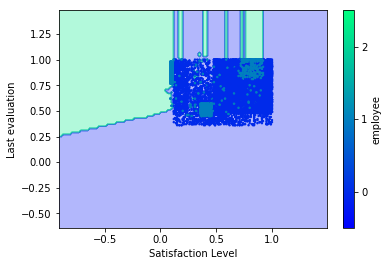

In [153]:
# Write your answer here (part7)

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline


h=0.02  


x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 0.5
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))


Z = knn_5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3, cmap='winter')

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = y, s=2, cmap='winter')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.colorbar(ticks=range(3), label='employee')  
plt.clim(-0.5, 2.5)

plt.xlabel("Satisfaction Level")  
plt.ylabel("Last evaluation") 

<p><b>Question #5</b>:</p>

<ol>
    <li>Download the Cars.csv dataset from the Canvas and use <b>read_csv( )</b> to read it.</li>
    <li>Convert categorical variables to dummy variables.</li>
    <li>Create scatter plots to show the relationship between variables.
    <ul>
        <li>Put appropriate title, axis labels and legend for your visualization.</li>
        <li>Use the following variables in your work.</li>
        <ol>
            <li>Year (continuous variable)</li>
            <li>Transmission Type (categorical variable)</li>
            <li>Driven_Wheels (categorical variable)</li>
            <li>Number of Doors (categorical variable)</li>
            <li>Highway MPG (continuous variable)</li>
            <li>City MPG (continuous variable)</li>
            <li>Popularity (continuous variable)</li>
            <li>MSRP (continuous variable)</li>
        </ol>
    </ul>
    </li>
    <li>Run explonatory linear regression using <u>statsmodels</u> package.
    <ul>
        <li><b>MSRP</b> (Manufacturer Suggested Retail Price) is your target variable.</li>
    </ul>
    </li>
    <li>Which factors are significant at <b>.05</b> level in your model?</li>
    <li>What is the $R^2$ for your model? What does $R^2$ mean in this analysis?</li>
    <li>Use linear regression to creat a predictive model.
    <ul>
        <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
        <li>Use all features to create you predictive model.</li>
        <li><b>MSRP</b> is your dependent variable.</li> 
    </ul>
    </li>
    <li> Compute $R^2$ for both in-sample(train data) and out-of-sample (test data) data. Which one is higher? What was your expectation?</li> 
    <li> Compute MSE for both in-sample (train data) and out-of-sample (test data) data. Which one is higher? What was your expectation?</li>
</ol>

</p>

In [118]:
# Write your answer here (part1)
import pandas as pd

df = pd.read_csv('cars.csv')
#df = df.drop(["Make","Model","Engine Fuel Type","Engine HP","Engine Cylinders","Market Category","Vehicle Size","Vehicle Style","Transmission Type","Driven_Wheels"],axis = 1)

df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [119]:
# Write your answer here (part2)
df1=pd.DataFrame()

df1[['Year','Transmission Type','Driven_Wheels','Number of Doors','Highway MPG','City MPG','Popularity','MSRP']] = df[['Year','Transmission Type','Driven_Wheels','Number of Doors','highway MPG','city mpg','Popularity','MSRP']]

df2 = pd.get_dummies(df2, columns=['Transmission Type','Driven_Wheels','Number of Doors'])

df2.head()

,Year,Highway MPG,City MPG,Popularity,MSRP,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Number of Doors_2.0,Number of Doors_3.0,Number of Doors_4.0
0,2011,26,19,3916,46135,0,0,0,1,0,0,0,0,1,1,0,0
1,2011,28,19,3916,40650,0,0,0,1,0,0,0,0,1,1,0,0
2,2011,28,20,3916,36350,0,0,0,1,0,0,0,0,1,1,0,0
3,2011,28,18,3916,29450,0,0,0,1,0,0,0,0,1,1,0,0
4,2011,28,18,3916,34500,0,0,0,1,0,0,0,0,1,1,0,0


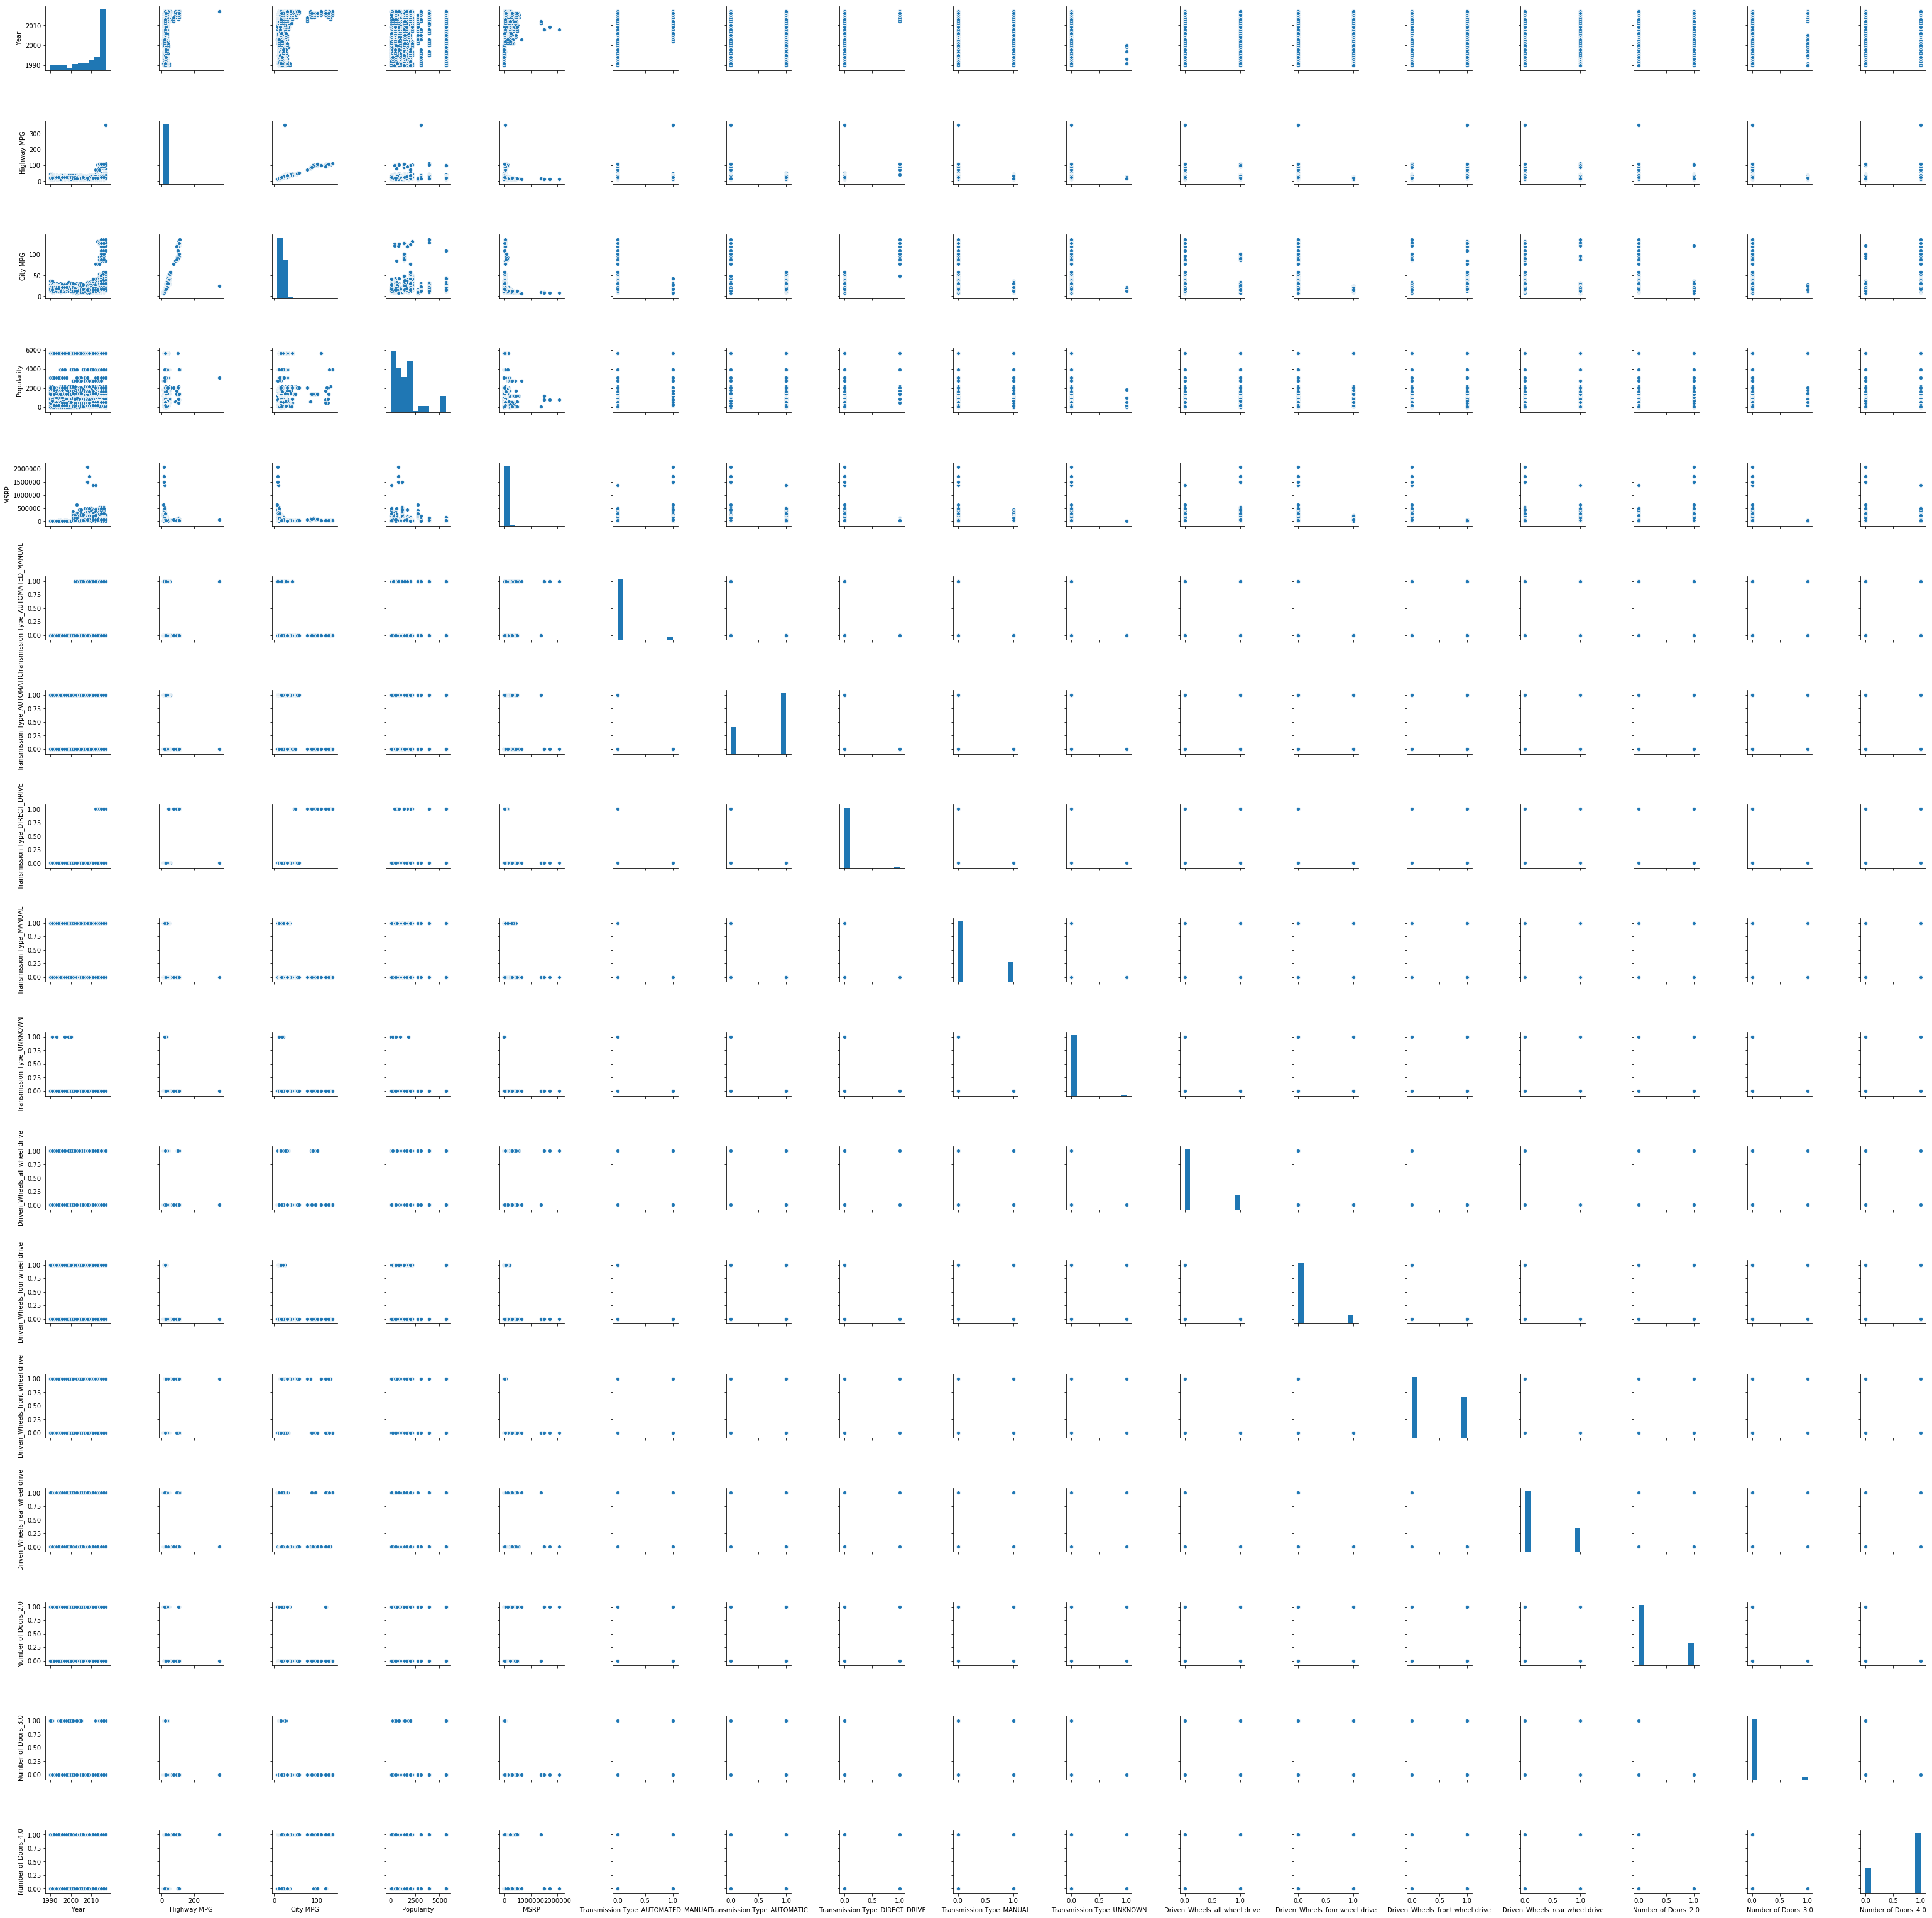

In [186]:
# Write your answer here (part3)

import seaborn as sns

sns.pairplot(df2)

In [120]:
# Write your answer here (part4)
Y = df2.loc[:,['MSRP']]
X = df2.loc[:,df2.columns != 'MSRP']



In [121]:
import statsmodels.api as sm

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     292.3
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:46:47   Log-Likelihood:            -1.4624e+05
No. Observations:               11914   AIC:                         2.925e+05
Df Residuals:                   11899   BIC:                         2.926e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Year

In [171]:
# Write your answer here (part5)

print("Factors significant at .05 in the model are:\n1) Number of Doors_2.0\n2) Number of Doors_4.0 ")

Factors significant at .05 in the model are:
1) Number of Doors_2.0
2) Number of Doors_4.0 


In [172]:
# Write your answer here (part6)

print("R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.")
print("R2 value of the model is: 0.256\nR2 value explains the variance in the model")

R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
R2 value of the model is: 0.256
R2 value explains the variance in the model


In [125]:
# Write your answer here (part7)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
model = LinearRegression(fit_intercept = True)


X = df2.loc[:,df2.columns != 'MSRP']
y = df2.loc[:,df2.columns == 'MSRP']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 0)


model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)

In [126]:
# Write your answer here (part8)

Train_in = model.score(X_train, y_train)
Test_out = model.score(X_test, y_test)

print("R2 value of Train Data is: {}".format(Train_in*100)) 
print("R2 value of Test Data is: {}".format(Test_out*100)) 

print("R2 value of Out-of-sample data is higher than that of In-sample data. However, we expected in-sample data to have higher value")

R2 value of Train Data is: 24.40919838533614
R2 value of Test Data is: 29.962442563175863
R2 value of Out-of-sample data is higher than that of In-sample data. However, we expected in-sample data to have higher value


In [127]:
# Write your answer here (part9)

from sklearn.metrics import mean_squared_error, mean_absolute_error 

MSE_train = mean_squared_error(y_train, model.predict(X_train)) 
MSE_test = mean_squared_error(y_test, model.predict(X_test)) 

print("MSE of Train data is: {}".format(MSE_train))
print("MSE of Test data is: {}".format(MSE_test))

print("MSE value of in-sample data is higher than that of Out-of-sample data and we expected the same result")

Mean Squared Error of Train data is: 3189519523.4450226
Mean Squared Error of Test data is: 1538772637.230896
MSE value of in-sample data is higher than that of Out-of-sample data and we expected the same result


<p><b>Output</b>: 
    <ul>
        <li>You need to provide answers in the designated cell for each question (don't delete the existing comments in the cells).</li>
        <li>You need to make sure that your final file contains both codes and results (don't clear the outputs).</li>
        <li>Save your file in the .ipynb format (as it is right now).</li>
        <li>Upload the file into the Canvas (Assignment #2)</li>
        <li>All the assignments should be submitted by <b>Monday Oct 19 at 11:59 PM</b>. No late submission will be accepted</li>
        <li>I will not accept any submission by email or any other method, so make sure that you submit the file in a right place at the right time.</li>
        </ul>
        </p> 